This portion of the project will analyze the prevalence of specific topics of music lyrics by decade, and also by specific genres. For this, we found a dataset showing numerous songs and their topics based on keywords found in the song's lyrics. 

In [32]:
import pandas as pd

music_topics = pd.read_csv("./data/music_topics.csv", header=0)
print(music_topics.head())
print(music_topics.tail())
print(music_topics.shape)
print(music_topics["topic"].value_counts()["sadness"])


   Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadne

In [33]:
#Check for duplicates
music_topics.duplicated().sum()

0

In [34]:
#get names of columns
print(music_topics.columns)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')


In [38]:
#Remove irrelevant columns (only works when put into another variable for some reason)
drop_cols = ['Unnamed: 0', 'dating', 'len', 'shake the audience', 'family/gospel', 'communication', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']
music_topics_df = music_topics.drop(labels=drop_cols, axis=1)
#print(music_topics["topic"].value_counts()["sadness"])
#verify that columns were dropped
print(music_topics_df.shape)
print(music_topics_df.columns)

(28372, 12)
Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics',
       'violence', 'world/life', 'night/time', 'romantic', 'obscene',
       'sadness', 'topic'],
      dtype='object')


In [12]:
#check for any null values 
print(music_topics_df.isnull().values.any())
print(music_topics_df.isnull().values.sum())

False
0


In [39]:
#drop rows where topic equals feelings
music_topics_df = music_topics_df.drop(music_topics_df[music_topics_df["topic"] == "feelings"].index)
print(music_topics_df.shape)

(27760, 12)


In [40]:
#parse the data out by decades 
music_topics_fifties = music_topics_df.loc[music_topics_df.release_date.isin([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])]
print(music_topics_fifties.shape)
music_topics_sixties = music_topics_df.loc[music_topics_df.release_date.isin([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969])]
print(music_topics_sixties.shape)
music_topics_seventies = music_topics_df.loc[music_topics_df.release_date.isin([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])]
print(music_topics_seventies.shape)
music_topics_eighties = music_topics_df.loc[music_topics_df.release_date.isin([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])]
print(music_topics_eighties.shape)
music_topics_nineties = music_topics_df.loc[music_topics_df.release_date.isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])]
print(music_topics_nineties.shape)
music_topics_2000s = music_topics_df.loc[music_topics_df.release_date.isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])]
print(music_topics_2000s.shape)
music_topics_2010s = music_topics_df.loc[music_topics_df.release_date.isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]
print(music_topics_2010s.shape)

(1443, 12)
(3324, 12)
(3826, 12)
(4581, 12)
(4372, 12)
(4678, 12)
(5536, 12)


In [41]:
#parse data out by genre
print(music_topics_df.genre.unique())
music_topics_pop = music_topics_df.loc[music_topics_df.genre == 'pop']
print(music_topics_pop.shape)
music_topics_country = music_topics_df.loc[music_topics_df.genre == 'country']
print(music_topics_country.shape)
music_topics_blues = music_topics_df.loc[music_topics_df.genre == 'blues']
print(music_topics_blues.shape)
music_topics_jazz = music_topics_df.loc[music_topics_df.genre == 'jazz']
print(music_topics_jazz.shape)
music_topics_reggae = music_topics_df.loc[music_topics_df.genre == 'reggae']
print(music_topics_reggae.shape)
music_topics_rock = music_topics_df.loc[music_topics_df.genre == 'rock']
print(music_topics_rock.shape)
music_topics_hip_hop = music_topics_df.loc[music_topics_df.genre == 'hip hop']
print(music_topics_hip_hop.shape)



['pop' 'country' 'blues' 'jazz' 'reggae' 'rock' 'hip hop']
(6902, 12)
(5340, 12)
(4457, 12)
(3764, 12)
(2442, 12)
(3953, 12)
(902, 12)


I removed the topic 'feelings' because it isn't descriptive enough or prevalent enough to gain anything of significance from it.

In [42]:
print(music_topics_df.topic.unique())
music_topics_pop.groupby(by="topic").count()

['sadness' 'world/life' 'music' 'romantic' 'violence' 'obscene'
 'night/time']


,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,503,503,503,503,503,503,503,503,503,503,503
night/time,455,455,455,455,455,455,455,455,455,455,455
obscene,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220
romantic,431,431,431,431,431,431,431,431,431,431,431
sadness,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702
violence,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
world/life,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349


['music', 'night/time', 'obscene', 'romantic', 'sadness', 'violence', 'world/life']


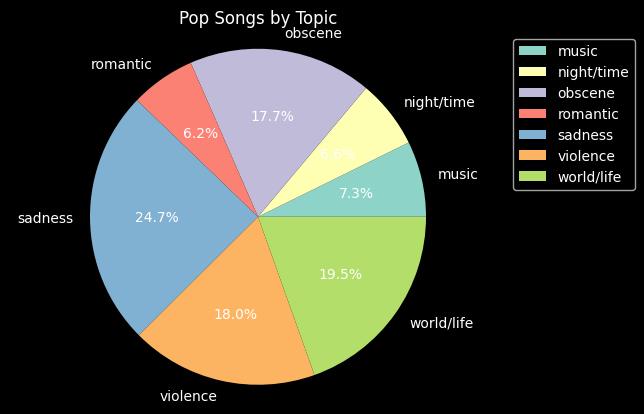

In [59]:
import matplotlib.pyplot as plt
#put pop songs into a pop chart, sort by topic
labels = list(music_topics_pop.topic.unique())
#alphabetize label list
labels.sort()
print(labels)
num_topics_pop = [503, 455, 1220, 431, 1702, 1242, 1349]

fig_pop, ax_pop = plt.subplots()

ax_pop.pie(num_topics_pop, labels= labels, autopct="%1.1f%%")

ax_pop.axis('equal')

plt.title('Pop Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()




In [52]:
music_topics_country.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,592,592,592,592,592,592,592,592,592,592,592
night/time,373,373,373,373,373,373,373,373,373,373,373
obscene,635,635,635,635,635,635,635,635,635,635,635
romantic,299,299,299,299,299,299,299,299,299,299,299
sadness,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571
violence,702,702,702,702,702,702,702,702,702,702,702
world/life,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168


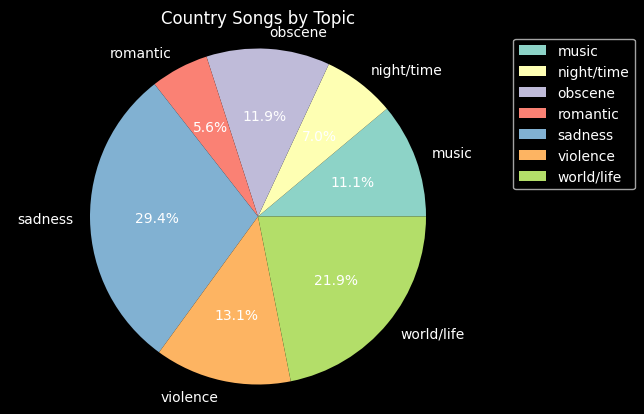

In [60]:

num_topics_country = [592, 373, 635, 299, 1571, 702, 1168]

fig_country, ax_country = plt.subplots()

ax_country.pie(num_topics_country, labels= labels, autopct="%1.1f%%")

ax_country.axis('equal')

plt.title('Country Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [53]:
music_topics_blues.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,453,453,453,453,453,453,453,453,453,453,453
night/time,355,355,355,355,355,355,355,355,355,355,355
obscene,605,605,605,605,605,605,605,605,605,605,605
romantic,309,309,309,309,309,309,309,309,309,309,309
sadness,894,894,894,894,894,894,894,894,894,894,894
violence,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
world/life,745,745,745,745,745,745,745,745,745,745,745


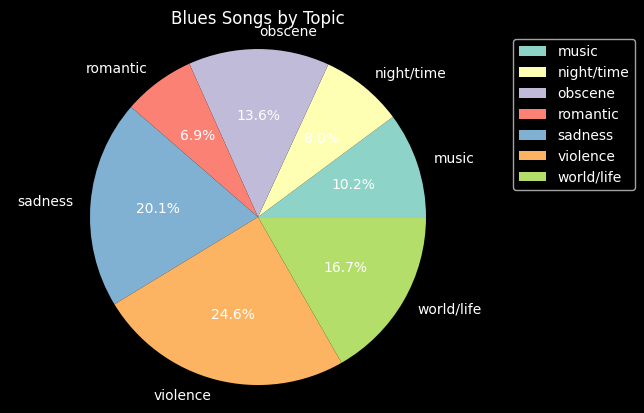

In [61]:
num_topics_blues = [453, 355, 605, 309, 894, 1096, 745]

fig_blues, ax_blues = plt.subplots()

ax_blues.pie(num_topics_blues, labels= labels, autopct="%1.1f%%")

ax_blues.axis('equal')

plt.title('Blues Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [54]:
music_topics_jazz.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,390,390,390,390,390,390,390,390,390,390,390
night/time,220,220,220,220,220,220,220,220,220,220,220
obscene,672,672,672,672,672,672,672,672,672,672,672
romantic,294,294,294,294,294,294,294,294,294,294,294
sadness,726,726,726,726,726,726,726,726,726,726,726
violence,681,681,681,681,681,681,681,681,681,681,681
world/life,781,781,781,781,781,781,781,781,781,781,781


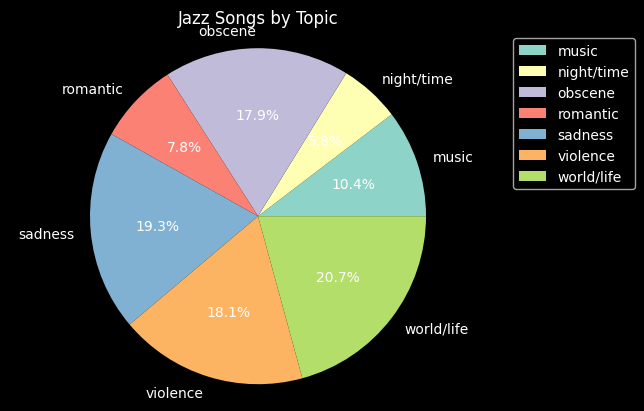

In [64]:
num_topics_jazz = [390, 220, 672, 294, 726, 681, 781]

fig_jazz, ax_jazz = plt.subplots()

ax_jazz.pie(num_topics_jazz, labels= labels, autopct="%1.1f%%")

ax_jazz.axis('equal')

plt.title('Jazz Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [55]:
music_topics_reggae.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,137,137,137,137,137,137,137,137,137,137,137
night/time,140,140,140,140,140,140,140,140,140,140,140
obscene,647,647,647,647,647,647,647,647,647,647,647
romantic,55,55,55,55,55,55,55,55,55,55,55
sadness,289,289,289,289,289,289,289,289,289,289,289
violence,586,586,586,586,586,586,586,586,586,586,586
world/life,588,588,588,588,588,588,588,588,588,588,588


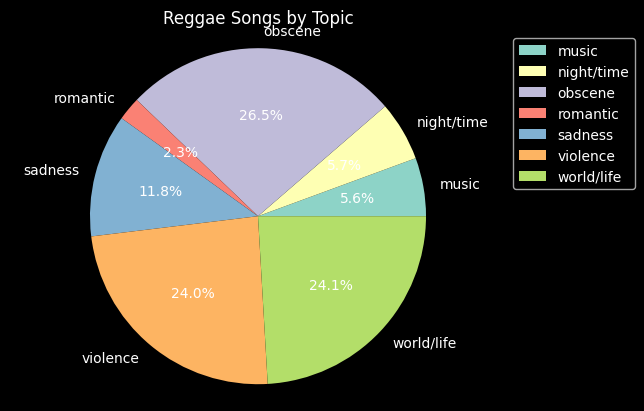

In [65]:
num_topics_reggae = [137, 140, 647, 55, 289, 586, 588]

fig_reggae, ax_reggae = plt.subplots()

ax_reggae.pie(num_topics_reggae, labels= labels, autopct="%1.1f%%")

ax_reggae.axis('equal')

plt.title('Reggae Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [56]:
music_topics_rock.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,213,213,213,213,213,213,213,213,213,213,213
night/time,272,272,272,272,272,272,272,272,272,272,272
obscene,407,407,407,407,407,407,407,407,407,407,407
romantic,133,133,133,133,133,133,133,133,133,133,133
sadness,878,878,878,878,878,878,878,878,878,878,878
violence,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306
world/life,744,744,744,744,744,744,744,744,744,744,744


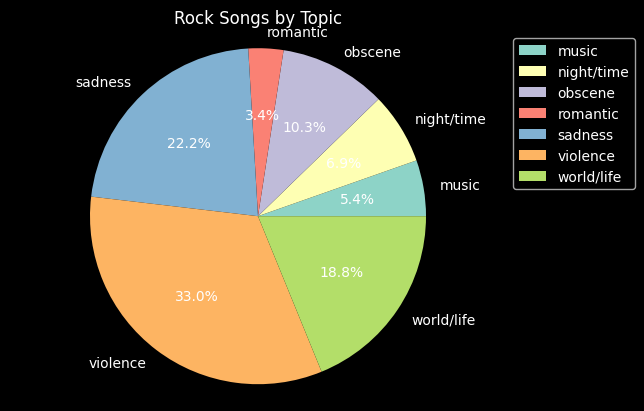

In [66]:
num_topics_rock = [213, 272, 407, 133, 878, 1306, 744]

fig_rock, ax_rock = plt.subplots()

ax_rock.pie(num_topics_rock, labels= labels, autopct="%1.1f%%")

ax_rock.axis('equal')

plt.title('Rock Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [57]:
music_topics_hip_hop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,15,15,15,15,15,15,15,15,15,15,15
night/time,10,10,10,10,10,10,10,10,10,10,10
obscene,696,696,696,696,696,696,696,696,696,696,696
romantic,3,3,3,3,3,3,3,3,3,3,3
sadness,36,36,36,36,36,36,36,36,36,36,36
violence,97,97,97,97,97,97,97,97,97,97,97
world/life,45,45,45,45,45,45,45,45,45,45,45


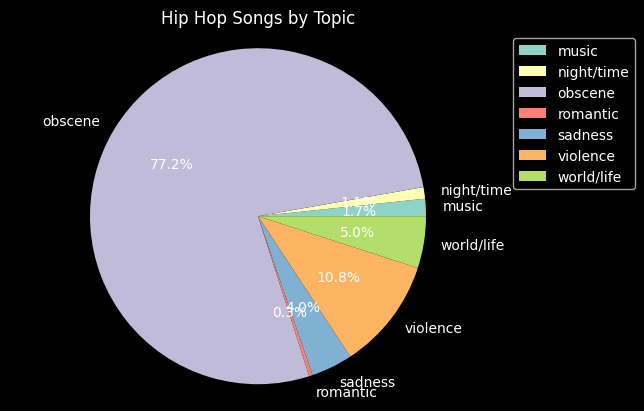

In [67]:
num_topics_hip_hop = [15, 10, 696, 3, 36, 97, 45]

fig_hip_hop, ax_hip_hop = plt.subplots()

ax_hip_hop.pie(num_topics_hip_hop, labels= labels, autopct="%1.1f%%")

ax_hip_hop.axis('equal')

plt.title('Hip Hop Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()